# Classification of Daily Expenses<n>
Author: Maria Kasznar (https://www.linkedin.com/in/biakasznar/) <br>
Date: June 2025


***

This machine learning project implements a multiclass classification pipeline to automatically categorize personal expense data collected during a year-long stay in Australia (July 2022 - July 2023), leveraging labels from two distinct cities (Brisbane and Perth). The model is specifically designed for transferability and reusability, with a key focus on accurately classifying unlabeled expenses from a third city (Jabiru).

While the core database has been translated into English for broader accessibility, the 'Description' column remains in Portuguese due to the complexity of automated translation for nuanced free-text entries. 

***

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.mode.chained_assignment = None

path = r'C:\Users\biaka\OneDrive\Documents\JupyterNotebooks\ExpensesClassification\data'
file_name = r'DailyExpenses_PythonProject.xlsx'

df = pd.read_excel(os.path.join(path, file_name))

In [67]:
list(df.columns)

['Date',
 'Cash Flow',
 'Description',
 'Category',
 'City',
 'Payer',
 'Mode of Payment',
 'Amount']

* **'Cash Flow'**: "C" for Credit (income), "D" for Debit (expense). Only expenses will be considered in this project, meaning the dataset will be filtered to include only "D" transactions.
* **'Description'**: A free-text field providing specific details about the transaction (Note: This column is in Portuguese, as previously discussed).
* **'Category'**: The classification or type of the expense (e.g., Food, Transport, Rent), serving as the target variable for your multiclass classification model.
* **'City'**: The geographical location where the transaction took place. For this project, __data from Brisbane and Perth is labeled__, while data from __Jabiru is the target__ for classification by the trained model.

The remaining columns, i.e. Date, Payer, Mode of Payment, and Amount, have straightforward names clearly indicating their respective data points.

### Data Cleaning

In [68]:
df_expenses = df[df['Cash Flow'] == 'D']

In [69]:
df_jabiru = df_expenses[df_expenses['City'] == 'Jabiru']
df_expenses.drop(df_expenses[(df_expenses['City'] != 'Brisbane') & (df_expenses['City'] != 'Perth')].index, inplace=True)

In [70]:
df_expenses.shape

(564, 8)

In [71]:
df_expenses.describe()

Date       Amount
count                            564   564.000000
mean   2023-02-17 00:35:44.680850944    71.253333
min              2022-10-03 00:00:00     1.000000
25%              2022-12-17 00:00:00    10.000000
50%              2023-02-05 12:00:00    24.450000
75%              2023-04-08 06:00:00    44.100000
max              2023-07-13 00:00:00  4200.000000
std                              NaN   266.601877

In [72]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 79 to 867
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             564 non-null    datetime64[ns]
 1   Cash Flow        564 non-null    object        
 2   Description      564 non-null    object        
 3   Category         551 non-null    object        
 4   City             564 non-null    object        
 5   Payer            564 non-null    object        
 6   Mode of Payment  564 non-null    object        
 7   Amount           564 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 39.7+ KB


__Category has 13 missing values.__ <br>
All other columns seem okay.

In [73]:
df_expenses[df_expenses.Category.isnull()]

Date Cash Flow                     Description Category      City  \
210 2022-11-27         D                   Saque - Carro      NaN  Brisbane   
211 2022-11-27         D    Pagamento - Carro & Mecânico      NaN  Brisbane   
212 2022-11-27         D                   Saque - Carro      NaN  Brisbane   
221 2022-12-01         D                     Saque - BQL      NaN  Brisbane   
226 2022-12-02         D          Transferência do carro      NaN  Brisbane   
242 2022-12-05         D                   Transferência      NaN  Brisbane   
318 2022-12-27         D                            Rego      NaN  Brisbane   
476 2023-02-15         D        Saque - Revisão do carro      NaN  Brisbane   
536 2023-02-27         D  Troca de Pneus & Realinhamento      NaN  Brisbane   
539 2023-02-27         D                   Transferência      NaN  Brisbane   
543 2023-02-27         D                   Transferência      NaN  Brisbane   
617 2023-03-14         D                            Bond      NaN     Perth   
679 2023-04-06         D                Revisão do carro      NaN     Perth   

     Payer Mode of Payment   Amount  
210  Bruno             NAB  2000.00  
211  Bruno             NAB  1550.00  
212    Bia             NAB  2000.00  
221  Bruno             NAB   250.00  
226  Bruno            Wise    60.80  
242    Bia             NAB   969.06  
318  Bruno             NAB   399.20  
476  Bruno             NAB   120.00  
536  Bruno             NAB   529.00  
539  Bruno             NAB   537.76  
543    Bia             NAB   350.00  
617  Bruno             NAB  1200.00  
679  Bruno             NAB   150.00

These expenses can be divided into 3 groups: withdrawals, transfers and occasional payments. None of them are part of the scope of the project.<br>Withdrawals and transfers are not expenses; they were recorded for track of cash flow.
*Occasional* expenses are not *daily*.<br>
Therefore, __all these rows will de deleted.__ 

In [74]:
df_expenses.dropna(subset = ['Category'], inplace=True)

In [75]:
#Unique values in relevant columns

for i in [3, 4, 5, 6]:
    print(df_expenses[list(df.columns)[i]].value_counts(), "\n\n")

Category
Restaurant                 193
Supermarket                103
Transport                   55
Gas                         50
Leisure Activity            44
Health Insurance            34
Misc                        27
Rent & Bills                19
Clothes                     11
Certificates & Licenses      6
Subscription                 6
-                            2
Trips                        1
Name: count, dtype: int64 


City
Brisbane    349
Perth       202
Name: count, dtype: int64 


Payer
Bruno    291
Bia      260
Name: count, dtype: int64 


Mode of Payment
NAB     497
Wise     54
Name: count, dtype: int64 




In [76]:
df_expenses[df_expenses.Category.isin(['-'])]

Date Cash Flow              Description Category      City  Payer  \
79  2022-10-03         D  Passagens para Brisbane        -  Brisbane  Bruno   
139 2022-11-09         D            Transferência        -  Brisbane  Bruno   

    Mode of Payment   Amount  
79             Wise   696.29  
139             NAB  1988.22

Once again, these rows fall under the undesired categories afore mentioned, and will be deleted.<br>
The first one is an occasional expense, while the second is a money transfer.<br>
Also, the category "Trips" will be excluded from further analysis due to an insufficient number of data points.

In [77]:
df_expenses.drop(df_expenses[df_expenses.Category.isin(['-', 'Trips'])].index, inplace = True)

In [78]:
categories = list(df_expenses.Category.unique())

In [79]:
df_expenses.reset_index(drop=True, inplace=True)

### Exploratory Data Analysis (EDA)

In [80]:
df_expenses.sort_values('Amount', ascending=False).head(10)

Date Cash Flow  Description      Category      City  Payer  \
4   2022-11-08         D      Aluguel  Rent & Bills  Brisbane    Bia   
0   2022-10-19         D      Aluguel  Rent & Bills  Brisbane    Bia   
545 2023-07-10         D  Pack & Send          Misc     Perth    Bia   
496 2023-06-13         D      Aluguel  Rent & Bills     Perth  Bruno   
349 2023-03-14         D      Aluguel  Rent & Bills     Perth  Bruno   
366 2023-03-21         D      Aluguel  Rent & Bills     Perth  Bruno   
379 2023-03-28         D      Aluguel  Rent & Bills     Perth  Bruno   
412 2023-04-11         D      Aluguel  Rent & Bills     Perth  Bruno   
420 2023-04-18         D      Aluguel  Rent & Bills     Perth  Bruno   
432 2023-04-25         D      Aluguel  Rent & Bills     Perth  Bruno   

    Mode of Payment   Amount  
4               NAB  4200.00  
0               NAB  2100.00  
545             NAB   487.97  
496             NAB   300.00  
349             NAB   300.00  
366             NAB   300.00  
379             NAB   300.00  
412             NAB   300.00  
420             NAB   300.00  
432             NAB   300.00

In [81]:
df_expenses.sort_values('Amount', ascending=False).tail(10)

Date Cash Flow              Description     Category      City  \
128 2022-12-17         D               Park Meter    Transport  Brisbane   
424 2023-04-20         D                 Car park    Transport     Perth   
292 2023-02-15         D        Woolies - Cookies  Supermarket  Brisbane   
118 2022-12-14         D             Hungry Jacks   Restaurant  Brisbane   
148 2022-12-24         D             Hungry Jacks   Restaurant  Brisbane   
543 2023-07-09         D        Macca's Spearwood   Restaurant     Perth   
391 2023-04-03         D        Foodland IGA Freo  Supermarket     Perth   
134 2022-12-18         D               Park Meter    Transport  Brisbane   
527 2023-07-03         D                  Woolies  Supermarket     Perth   
137 2022-12-18         D  McDonald's - Raspadinha   Restaurant  Brisbane   

     Payer Mode of Payment  Amount  
128  Bruno             NAB    2.90  
424    Bia             NAB    2.75  
292    Bia             NAB    2.50  
118  Bruno             NAB    2.50  
148  Bruno             NAB    2.50  
543    Bia             NAB    2.00  
391    Bia             NAB    2.00  
134  Bruno             NAB    1.75  
527  Bruno             NAB    1.65  
137    Bia             NAB    1.00

In [82]:
df_eda = df_expenses[df_expenses.Amount <= 500]

There are two identified outliers, originating from the Rent & Bills category. These instances are factually correct - the total amount for 3 months worth of rent was paid in 2 installments. They will be excluded from subsequent graphical representations to prevent distortion, while remaining in the underlying dataset for analytical integrity.
***

In [83]:
box_order = df_eda[['Category', 'Amount']].groupby('Category').std().sort_values('Amount', ascending=False).iloc[::1].index

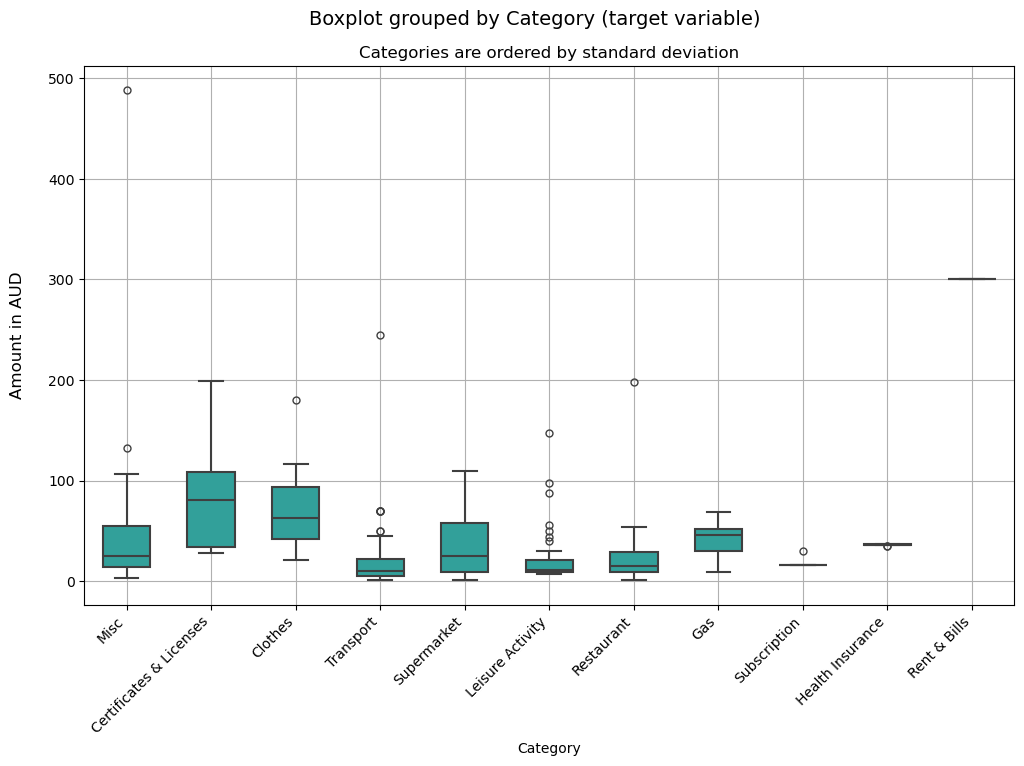

In [84]:
fig, ax = plt.subplots(figsize=(12, 7))
boxplot = sns.boxplot(y='Amount', x='Category', data=df_eda, order=box_order, 
                      gap=0.3, color='lightseagreen', fliersize=5, linewidth=1.5)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.suptitle(t='Boxplot grouped by Category (target variable)', fontsize=14, y=0.96)
plt.title('Categories are ordered by standard deviation', fontsize=12)
plt.ylabel('Amount in AUD\n', fontsize=12)
plt.grid()
plt.show()

In [85]:
df_eda[['Category', 'Amount']].groupby('Category').describe().sort_values(('Amount', 'std'), ascending=False)

Amount                                           \
                         count        mean        std     min       25%   
Category                                                                  
Misc                      27.0   53.021852  92.421856    3.00   14.5000   
Certificates & Licenses    6.0   87.506667  65.867656   28.02   34.0150   
Clothes                   11.0   73.625455  46.855489   20.75   42.4500   
Transport                 55.0   21.300909  36.178831    1.75    5.0000   
Supermarket              103.0   35.123010  30.583880    1.65    9.5500   
Leisure Activity          44.0   22.606818  27.680220    7.30    9.0000   
Restaurant               193.0   20.394560  18.276039    1.00    8.9500   
Gas                       50.0   40.069400  15.749518    9.45   30.0225   
Subscription               6.0   18.331667   5.711394   16.00   16.0000   
Health Insurance          34.0   36.512353   0.337971   35.23   36.5300   
Rent & Bills              17.0  300.000000   0.000000  300.00  300.0000   

                                                  
                            50%      75%     max  
Category                                          
Misc                      25.40   55.025  487.97  
Certificates & Licenses   80.50  109.000  199.00  
Clothes                   63.00   93.475  179.99  
Transport                 10.00   22.545  244.99  
Supermarket               25.16   57.660  109.42  
Leisure Activity          11.25   21.000  147.20  
Restaurant                15.00   28.810  198.00  
Gas                       46.05   52.275   68.89  
Subscription              16.00   16.000   29.99  
Health Insurance          36.53   36.730   36.73  
Rent & Bills             300.00  300.000  300.00

In [86]:
df_eda[df_eda.Category == 'Transport'].sort_values('Amount')

Date Cash Flow                 Description   Category      City  \
134 2022-12-18         D                  Park Meter  Transport  Brisbane   
424 2023-04-20         D                    Car park  Transport     Perth   
128 2022-12-17         D                  Park Meter  Transport  Brisbane   
82  2022-12-03         D                  Park Meter  Transport  Brisbane   
186 2023-01-06         D                    Car park  Transport  Brisbane   
249 2023-01-28         D                    Car park  Transport  Brisbane   
243 2023-01-27         D                    Car park  Transport  Brisbane   
282 2023-02-11         D                    Car park  Transport  Brisbane   
301 2023-02-18         D                    Car park  Transport  Brisbane   
308 2023-02-20         D                    Car Park  Transport  Brisbane   
338 2023-02-27         D                    Car Park  Transport  Brisbane   
342 2023-02-27         D                      Ônibus  Transport  Brisbane   
192 2023-01-07         D                    Car park  Transport  Brisbane   
178 2023-01-02         D                    Car park  Transport  Brisbane   
166 2022-12-29         D                    Car park  Transport  Brisbane   
156 2022-12-26         D                    Car park  Transport  Brisbane   
269 2023-02-04         D                    Car park  Transport  Brisbane   
233 2023-01-25         D                    Car park  Transport  Brisbane   
218 2023-01-20         D                    Car park  Transport  Brisbane   
329 2023-02-25         D                    Car Park  Transport  Brisbane   
124 2022-12-16         D                  Park Meter  Transport  Brisbane   
312 2023-02-21         D                   Translink  Transport  Brisbane   
71  2022-11-28         D       Pedágio - CarNextDoor  Transport  Brisbane   
290 2023-02-13         D  Translink - GoCard em casa  Transport  Brisbane   
89  2022-12-04         D                  Park Meter  Transport  Brisbane   
343 2023-03-02         D                       Linkt  Transport  Brisbane   
291 2023-02-14         D                       Linkt  Transport  Brisbane   
313 2023-02-21         D                   Translink  Transport  Brisbane   
322 2023-02-23         D                      GoCard  Transport  Brisbane   
247 2023-01-27         D                      GoCard  Transport  Brisbane   
221 2023-01-21         D                      GoCard  Transport  Brisbane   
229 2023-01-24         D                      GoCard  Transport  Brisbane   
350 2023-03-15         D                     Parking  Transport     Perth   
145 2022-12-22         D                  Park Meter  Transport  Brisbane   
52  2022-11-23         D         Estacionamento Myer  Transport  Brisbane   
306 2023-02-20         D                       Linkt  Transport  Brisbane   
97  2022-12-07         D                  Park Meter  Transport  Brisbane   
525 2023-07-03         D         Uber - mecânico ida  Transport     Perth   
526 2023-07-03         D       Uber - mecânico volta  Transport     Perth   
193 2023-01-08         D          Car park - Moreton  Transport  Brisbane   
107 2022-12-10         D                      GoCard  Transport  Brisbane   
98  2022-12-08         D                       Linkt  Transport  Brisbane   
41  2022-11-19         D                     Go Card  Transport  Brisbane   
39  2022-11-19         D                     Go Card  Transport  Brisbane   
18  2022-11-12         D                     Go Card  Transport  Brisbane   
16  2022-11-12         D                     Go Card  Transport  Brisbane   
272 2023-02-06         D                      GoCard  Transport  Brisbane   
547 2023-07-11         D         Uber para aeroporto  Transport     Perth   
62  2022-11-26         D                      GoCard  Transport  Brisbane   
3   2022-11-08         D                     Go Card  Transport  Brisbane   
195 2023-01-09         D                      GoCard  Transport  Brisbane   
141 20

#### Key Insights from Categories:

- __Most Consistent Spending:__ "Rent & Bills," "Health Insurance," and "Subscription" show highly predictable and consistent spending, which matches their recurring nature. All 3 have clearly distinct means, so it should be easy to properly classify them.
- __Highly Variable Spending (with Outliers):__ "Misc," "Leisure Activity," and "Transport" exhibit significant variability and a presence of high-value outliers, where a few transactions are much larger than the typical amount. This behaviour was expected for "Misc" because, as the name suggest, it gathers expenses that have no clear tie to each other. For "Transport", a closer look (table above) shows that there are 2 distinctive groups inside it: parking expenses (park meters and car parks), and public transport expenses (top-up of GoCard, Translink). The first one roughly ranges from \\$1.75 to \\$5, while the second goes from \\$10 to \\$70. Splitting the current "Transport" category into 2 could benefit the classification model.  
***

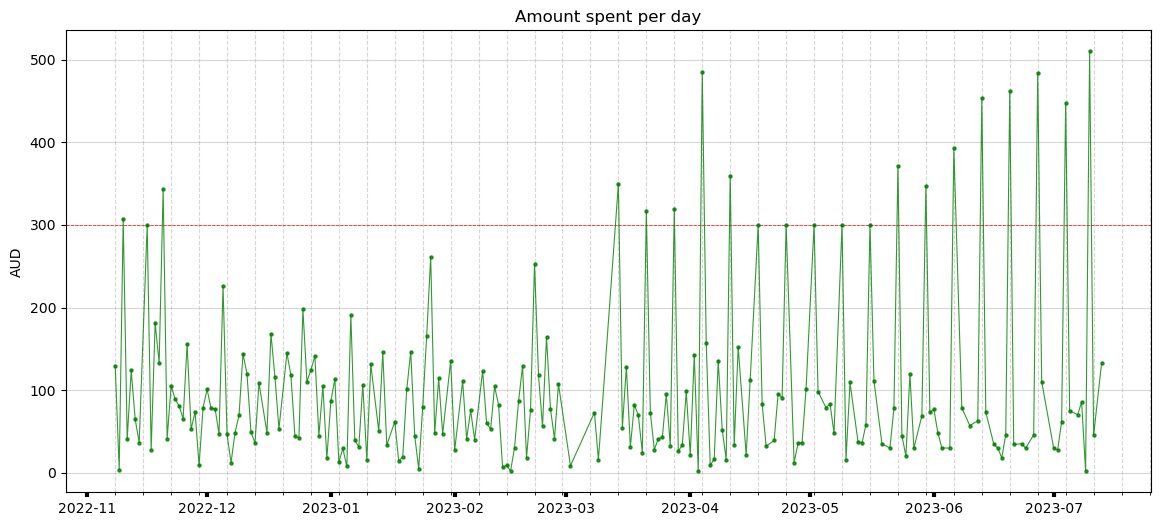

In [87]:
import matplotlib.dates as mdates

df_gb_day = df_eda.groupby('Date').Amount.sum()
df_gb_day = df_gb_day.to_frame()
df_gb_day['day_of_week'] = df_gb_day.index.weekday

fig = plt.figure(figsize=(14,6))
ax = fig.gca()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
date_format = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)

plt.title('Amount spent per day')
plt.ylabel('AUD')

plt.axhline(y=300, color='r', linestyle='--', linewidth=0.6, alpha=0.5)
plt.axhline(y=300, color='r', linestyle='--', linewidth=0.6, alpha=0.5)

plt.plot(df_gb_day.index, df_gb_day.Amount, '-go', linewidth=0.8, markersize=2.2, alpha=0.8)
ax.yaxis.grid(True, alpha=0.5)
ax.xaxis.grid(which='minor', linestyle='--', alpha=0.5)
ax.xaxis.set_tick_params(width=3)

plt.show()

#### Key Insights from Date:

From roughly mid-March onwards, there's a very distinct weekly pattern. For a while in April and May, it was consistently hitting a value around 300, which could suggest a regular, fixed expense (like a weekly rent). 
Further investigation is recommended to identify categories exhibiting a seasonal component. From this primary analysis, the weekday appears to be a promising feature for inclusion in the model's input.

***

In [88]:
df_gb_date = df_eda[['Category', 'Date']].groupby(['Category', df_eda.Date.dt.weekday]).agg(['count','nunique'])
df_gb_date.columns = df_gb_date.columns.get_level_values(1)

df_gb_amount = df_eda[['Category', 'Date', 'Amount']].groupby(['Category', df_eda.Date.dt.weekday]).Amount.agg(['sum', 'mean','median'])

df_gb = pd.concat([df_gb_date, df_gb_amount], axis=1)
df_gb['average_amount_per_day'] = df_gb['sum'] / df_gb['nunique']

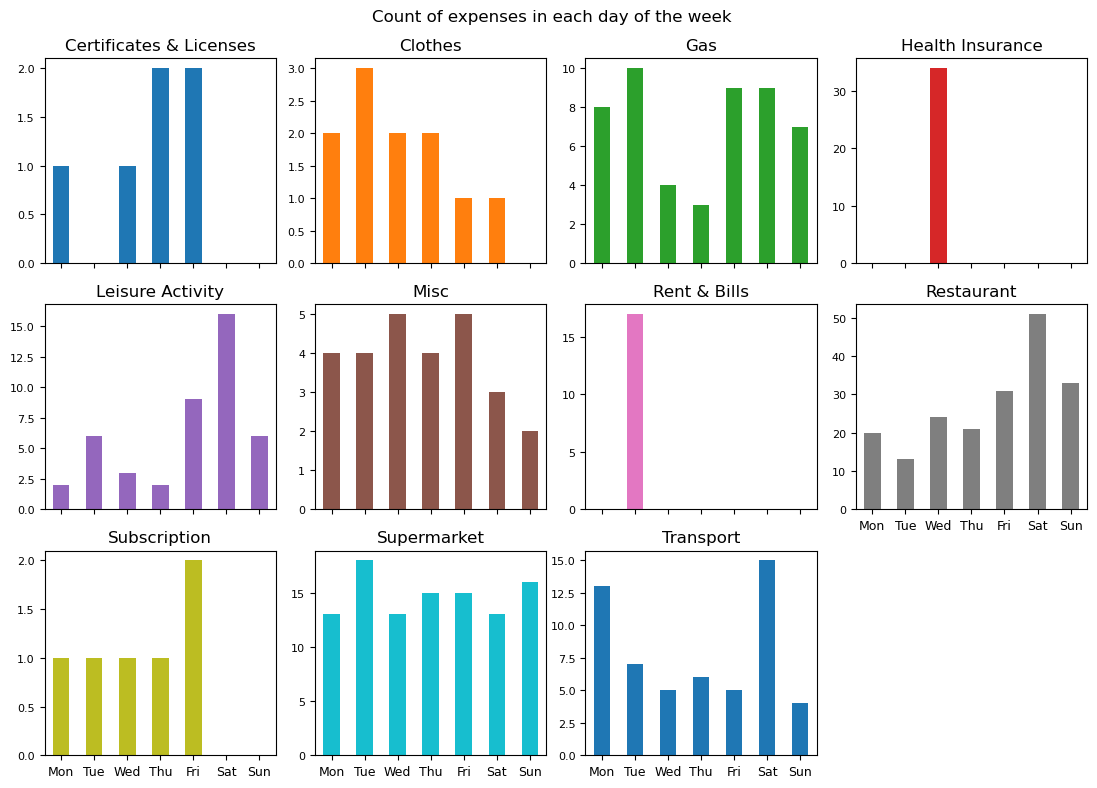

In [89]:
subp = df_gb['count'].unstack(level=0).plot( kind='bar',
                                      subplots=True,
                                      figsize=(11, 8), 
                                      layout=(3,4), 
                                      legend=False,
                                      sharex=True,
                                      fontsize=8, 
                                      title='Count of expenses in each day of the week',
                                      xlabel=''
                                    )


for subplot in subp.flatten():
    subplot.set_xticks(range(0, 7))
    subplot.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0, fontsize=9, ha='center')

plt.tight_layout()
plt.show()

#### Key Insights from day of week from Date:

- __Recurring Payments:__ "Health Insurance" and "Rent & Bills" demonstrate extremely strong single-day patterns, indicative of automated or scheduled recurring payments. This explains the previously identified behaviour.
- __Weekend vs. Weekday Spending:__ Categories like "Leisure Activity" and "Restaurant" clearly show a strong skew towards Friday & weekend spending, which is intuitive.

Both day of the week and weekday/weekend provide valuable information and can be used as inputs for the model.
***

In [90]:
percentage_payer = df_eda.groupby('Payer')['Amount'].count() / df_eda.shape[0]
for p in range(len(percentage_payer)):
    print("\033[1m", "Percentage of payments made by", percentage_payer.index[p], ":", format(percentage_payer.iloc[p], ".2%"), "\033[0m")

 Percentage of payments made by Bia : 47.07% 
 Percentage of payments made by Bruno : 52.93% 


In [91]:
palette = dict(zip(percentage_payer.index, sns.color_palette(palette="blend:#5A9,#A56", n_colors=2)))

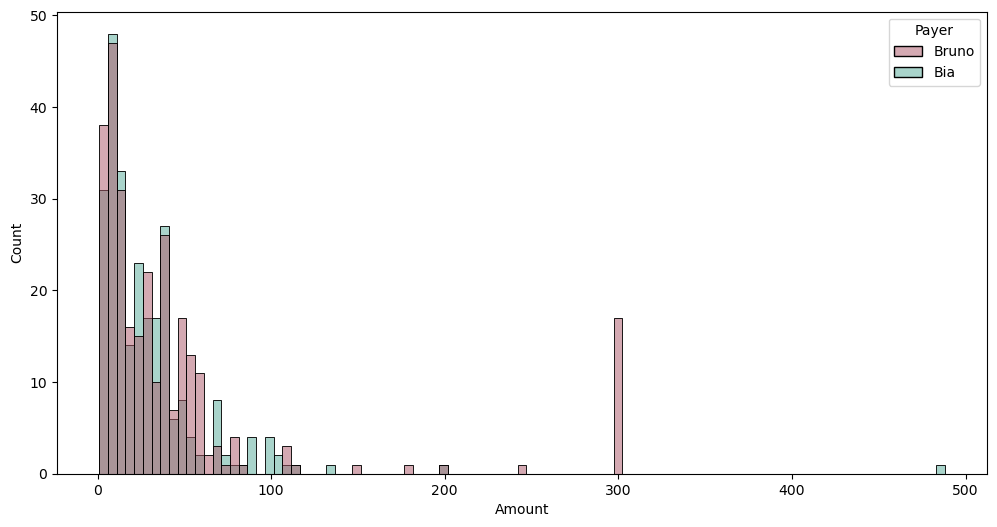

In [92]:
plt.figure(figsize=(12,6))

sns.histplot(data=df_eda, x='Amount',  hue='Payer', palette=palette, binwidth=5)
plt.show()

In [93]:
df_gb_payer = df_eda[['Category', 'Amount', 'Payer']].groupby(['Category','Payer']).Amount.agg(['sum', 'mean','median', 'count'])

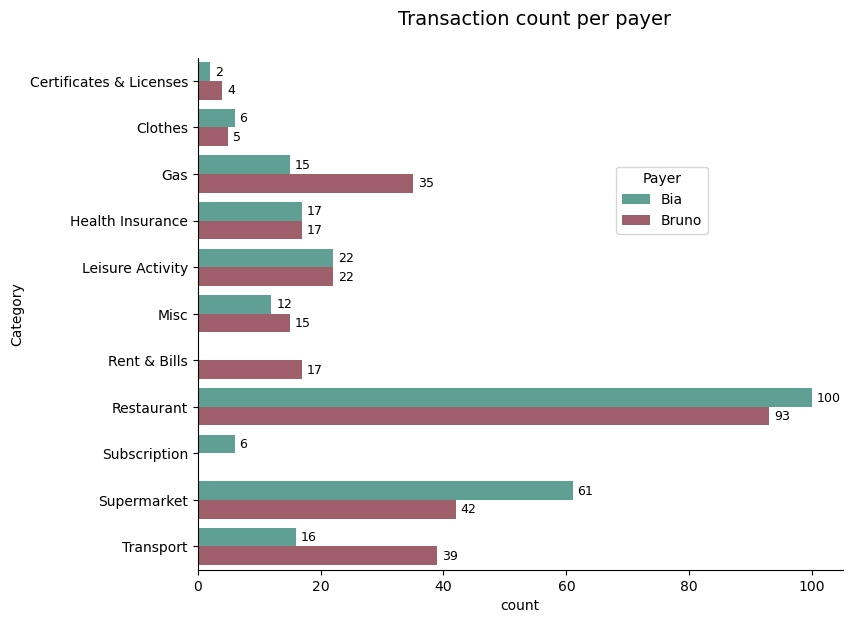

In [94]:
grid = sns.catplot(kind='bar', 
                 data=df_gb_payer, 
                 x='count', 
                 y='Category', 
                 hue='Payer', 
                 palette=palette                 
                  )

sns.move_legend(grid, 'upper right', bbox_to_anchor=(0.75, 0.8), frameon=True)
grid.fig.set_size_inches(w=15, h=6)

ax = grid.facet_axis(0,0)
for p in ax.patches[:-2:1]:
    ax.text(x=p.get_width()+0.8, y=p.get_y()+0.28, s=int(p.get_width()), fontsize=9)
    
plt.suptitle("Transaction count per payer", y=1.05, x=0.63, fontsize=14)
plt.show()

#### Key Insights from Payers:

- __Full Responsibility:__ Bia handles "Subscription" costs (all 6 transactions), while Bruno is solely responsible for "Rent & Bills" (all 17 transactions).
- __Shared Responsability:__ most categories are shared equally between Bia and Bruno. Bia paid for more Supermarket expenses, and Bruno took care of Gas and Transport more frequently. 

***

In [95]:
df_gb_mop = df_eda[['Category', 'Amount', 'Mode of Payment']].groupby(['Category','Mode of Payment']).Amount.agg(['sum', 'mean','median', 'count'])

In [96]:
mop_dict = {}

for cat in categories:
    mop_dict[cat] = list(df_gb_mop.loc[cat].index)

dict_NAB = dict(filter(lambda kv: kv[1] == ["NAB"], mop_dict.items()))
dict_Wise = dict(filter(lambda kv: kv[1] == ["Wise"], mop_dict.items()))
dict_both = dict(filter(lambda kv: kv[1] == ["NAB", "Wise"], mop_dict.items()))

percentage_mop = df_eda.groupby('Mode of Payment')['Amount'].count() / df_eda.shape[0]

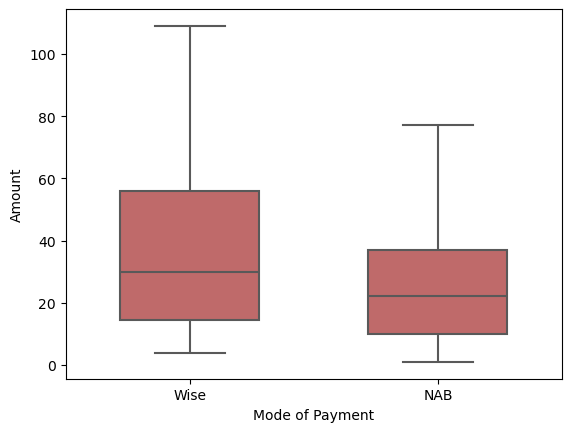

In [97]:
boxplot = sns.boxplot(y='Amount', x='Mode of Payment', data=df_eda,
                      gap=0.3, color='indianred', showfliers=False, linewidth=1.5)

In [98]:
df_eda[['Mode of Payment', 'Amount']].groupby('Mode of Payment').describe()

Amount                                                     \
                 count       mean        std  min      25%   50%      75%   
Mode of Payment                                                             
NAB              494.0  37.672733  59.180313  1.0   9.9000  22.1  37.0000   
Wise              52.0  44.829423  44.909100  3.9  14.5825  30.0  55.8275   

                         
                    max  
Mode of Payment          
NAB              487.97  
Wise             199.00

In [99]:
print("\n")

for p in range(len(percentage_mop)):
    print("Percentage of payments made through", "\033[1m", percentage_mop.index[p], ":", format(percentage_mop.iloc[p], ".2%"), "\033[0m")

print("\n")
print("\033[1mCategories paid ONLY through NAB:\033[0m", *list(dict_NAB.keys()), sep="\n  " )
print("\n")
print("\033[1mCategories paid ONLY through Wise:\033[0m", *list(dict_Wise.keys()), sep="\n  " )
print("\n")
print("\033[1mCategories paid through both NAB and Wise:\033[0m", *list(dict_both.keys()), sep="\n  " )



Percentage of payments made through  NAB : 90.48% 
Percentage of payments made through  Wise : 9.52% 


Categories paid ONLY through NAB:
  Rent & Bills
  Clothes
  Health Insurance
  Gas


Categories paid ONLY through Wise:
  Certificates & Licenses


Categories paid through both NAB and Wise:
  Supermarket
  Restaurant
  Transport
  Misc
  Leisure Activity
  Subscription


#### Key Insights from Mode of Payment:

NAB is the primary payment method, with 90.48% of all payments. Wise is used for specific purposes, like paying for Certificates and Licenses. On average, payments done with Wise are more expensive.  

***

### Feature Selection

The insights gleaned from EDA demonstrate that each available variable provides valuable information, justifying their incorporation into the model.<br>
From the 'Date' variable, we will engineer new features: '__Day of Week__' (0 to 6 - Monday to Sunday) and '__Weekday__' (boolean - 1 if it is a weekday, 0 if it is a weekend) to capture temporal patterns.

In [100]:
X = df_expenses.copy()
X['Day of Week'] = X['Date'].dt.dayofweek
X['Weekday'] = np.where(X['Day of Week'] < 5, 1, 0)

features = ['Day of Week', 'Weekday', 'Description', 'Payer', 'Mode of Payment', 'Amount']

y = pd.DataFrame(X.Category)
X = X[features]

Prior to the pre-processing stage - which will encompass ordinal encoding, TF-IDF vectorization, and standard scaling -, the dataset will be spli into training and testing sets to avoid data leakage.

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Pre-Processing

The next step is to transform the data into a suitable format for training a machine learning model.<br>
First, the target variable ('Category') undergoes ordinal encoding.<br>
Second, a ColumnTransformer applies specific transformations to different input feature types: 
- ordinal encoding for binary categorical features
- TF-IDF vectorization for free text
- standard scaling for numerical features.
  
All these steps are done within a robust pipeline.

In [102]:
#Creating Pipeline

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

# Output
oe_target = OrdinalEncoder()
y_train = oe_target.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=['Category'])

y_test = oe_target.transform(y_test)
y_test = pd.DataFrame(y_test, columns=['Category'])

# Inputs
bin_cat_columns = ['Payer', 'Mode of Payment']
free_text_columns = ['Description']
num_columns = ['Amount']

# PREPROCESSORS
bin_cat_pp = Pipeline([
    ('ordinal_enc', OrdinalEncoder())
                      ])

free_text_pp = Pipeline([
    ('tfidf', TfidfVectorizer())
                        ])

num_pp = Pipeline([
    ('scaler', StandardScaler())
                  ])

preprocessor = ColumnTransformer(
    [
        ('binary_categorical', bin_cat_pp, bin_cat_columns),
        ('free_text', free_text_pp, free_text_columns[0]),
        ('numerical', num_pp, num_columns)
    ]
                                )

## Model selection

This phase is about choosing the best machine learning model and its settings (hyperparameters). Ten different models were evaluated on a validation set to ensure they generalize well to new, unseen data. These models can be divided in 5 groups:
1. __Tree-based__: These models make decisions by recursively splitting the data based on feature conditions, forming a tree-like structure that leads to a prediction at the "leaves". *DecisionTreeClassifier, RandomForestClassifier, and GradientBoostingClassifier*  
2. __Support Vector Machine__: SVMs work by finding the optimal hyperplane in a high-dimensional space that maximally separates different classes of data points. *SVC (Support Vector Classifier)*
3. __Nearest Neighbors__: They classify a new data point by finding the 'k' closest existing data points and assigning the new point to the majority class or average value of those neighbors. *KNeighborsClassifier (KNN), and NearestCentroid*
4. __Linear__: Linear models predict a target variable by learning a straight-line (or hyperplane) relationship based on a weighted sum of the input features. *LogisticRegression, and SGDClassifier (Stochastic Gradient Descent Classifier)*
5. __Neural Network__: Inspired by the human brain, these models process information through layers of interconnected nodes (neurons) that learn complex patterns and relationships from data. *MLPClassifier (Multi-layer Perceptron Classifier)*
6. __Naive Bayes__: This probabilistic classifier uses Bayes' theorem to predict the probability of a data point belonging to a certain class, assuming that features are independent of each other. *BernoulliNB*

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid

dict_classifiers = {
    "DecisionTreeClassifier" : DecisionTreeClassifier(random_state=0),
    "RandomForest": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "SVC" : SVC(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "NearestCentroid" :  NearestCentroid(),
    "LogisticRegression": LogisticRegression(random_state=0),
    "SGDClassifier" : SGDClassifier(random_state=0),
    "MLPClassifier" : MLPClassifier(random_state=0),
    "Bernoulli" : BernoulliNB(),
                    }

In [104]:
df_predictions = pd.DataFrame()
cm_dict = {}
accuracy_dict = {}
f1_dict = {}
macro_precision_dict = {}
macro_recall_dict = {}

In [105]:
from sklearn.compose import make_column_selector
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings

warnings.filterwarnings("ignore")

i = 1
n_models = len(dict_classifiers)

# Testing models
for model, model_instantiation in dict_classifiers.items():
    
    pipeline = make_pipeline(preprocessor, model_instantiation)
    print ('\033[1m' + 'Fitting ' + model + ' (' + str(i) + ' out of ' + str(n_models) + ')\033[0m')
    pipeline.fit(X_train, y_train)

    predictions = pipeline.predict(X_test)
    df_predictions[model] = predictions 
    
    cm = confusion_matrix(y_test, predictions)
    cm_dict.update({model:cm})

    accuracy = accuracy_score(y_test, predictions)
    accuracy_dict.update({model:accuracy})

    f1 = f1_score(y_test, predictions, average='macro')
    f1_dict.update({model:f1})
    
    macro_precision = precision_score(y_test, predictions, average='macro')
    macro_precision_dict.update({model:macro_precision})

    macro_recall = recall_score(y_test, predictions, average='macro')
    macro_recall_dict.update({model:macro_recall})

    print ("Finished model", model, "\n")
    i +=1


Fitting DecisionTreeClassifier (1 out of 10)
Finished model DecisionTreeClassifier 

Fitting RandomForest (2 out of 10)
Finished model RandomForest 

Fitting GradientBoostingClassifier (3 out of 10)
Finished model GradientBoostingClassifier 

Fitting SVC (4 out of 10)
Finished model SVC 

Fitting KNN (5 out of 10)
Finished model KNN 

Fitting NearestCentroid (6 out of 10)
Finished model NearestCentroid 

Fitting LogisticRegression (7 out of 10)
Finished model LogisticRegression 

Fitting SGDClassifier (8 out of 10)
Finished model SGDClassifier 

Fitting MLPClassifier (9 out of 10)
Finished model MLPClassifier 

Fitting Bernoulli (10 out of 10)
Finished model Bernoulli 



#### Metric Selection
The evaluation metric chosen was F1 (macro) because it balances precision and recall for every class. This approach effectively handles class imbalance by giving equal weight to each class's performance, ensuring the model performs well across all categories, even minority ones. Additionally, accuracy, precision and recall will also be monitored to provide a broader understanding of the model's overall performance.

In [106]:
df_modelres = pd.DataFrame(
                            [accuracy_dict, f1_dict, macro_precision_dict, macro_recall_dict]
                          ).T.rename(columns=
                                              {0:'Accuracy', 1:'F1_Score' , 2:'Macro_Precision', 3:'Macro_Recall'}
                                    )

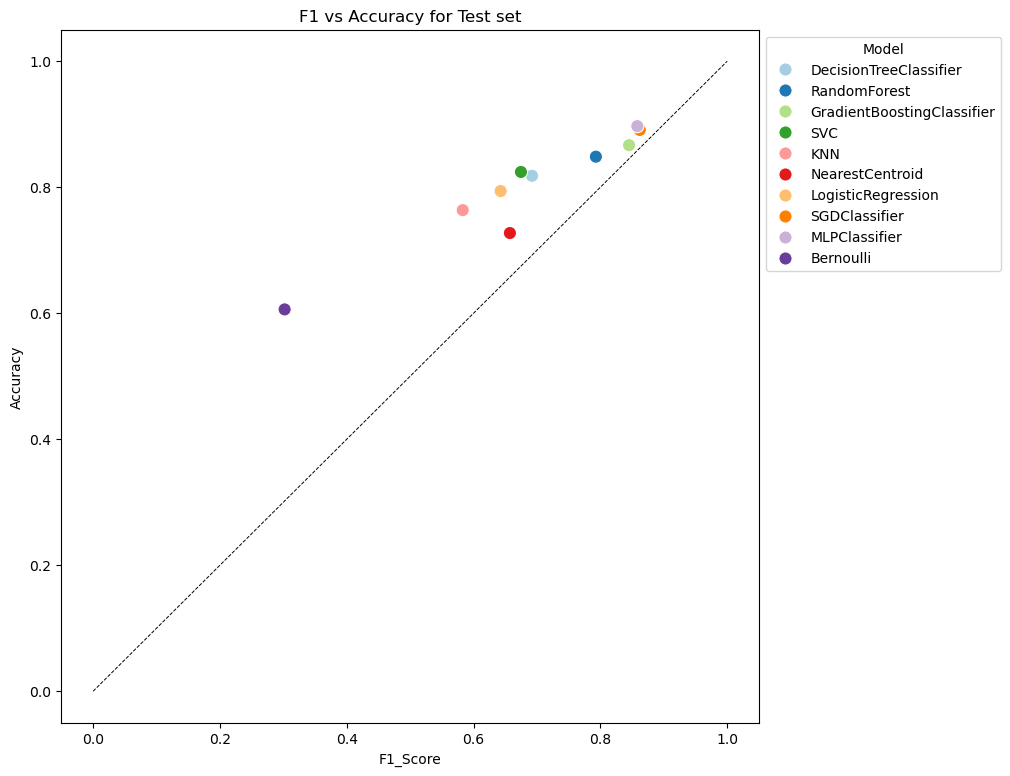

In [107]:
plt.figure(figsize=(9,9))

figure = sns.scatterplot(data=df_modelres, x="F1_Score", y="Accuracy", hue=df_modelres.index, 
                         s=90, palette='Paired')
sns.move_legend(figure, "upper left", bbox_to_anchor=(1, 1), title='Model')
figure.plot([0,1],[0,1], '--k', linewidth=0.7)
figure.set_title('F1 vs Accuracy for Test set')

plt.show()

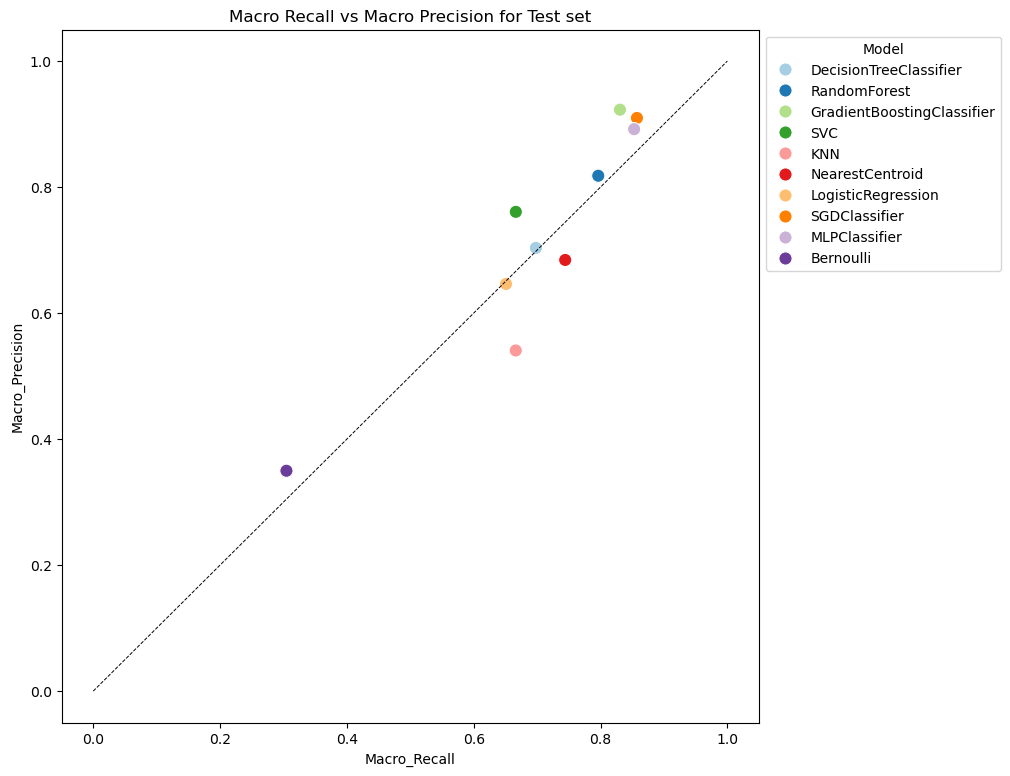

In [108]:
plt.figure(figsize=(9,9))

figure = sns.scatterplot(data=df_modelres, x="Macro_Recall", y="Macro_Precision", hue=df_modelres.index, 
                         s=90, palette='Paired')
sns.move_legend(figure, "upper left", bbox_to_anchor=(1, 1), title='Model')
figure.plot([0,1],[0,1], '--k', linewidth=0.7)
figure.set_title('Macro Recall vs Macro Precision for Test set')

plt.show()

To select the models that should proceed for the fine tuning stage, the following criteria will be used:
- High overall performance, with a good balance among the metrics
- Diversity in approach of models

That being said, the 3 models that stand out are __GradientBoostingClassifier (tree), SGDClassifier (linear) and MLPClassifier (NN)__.

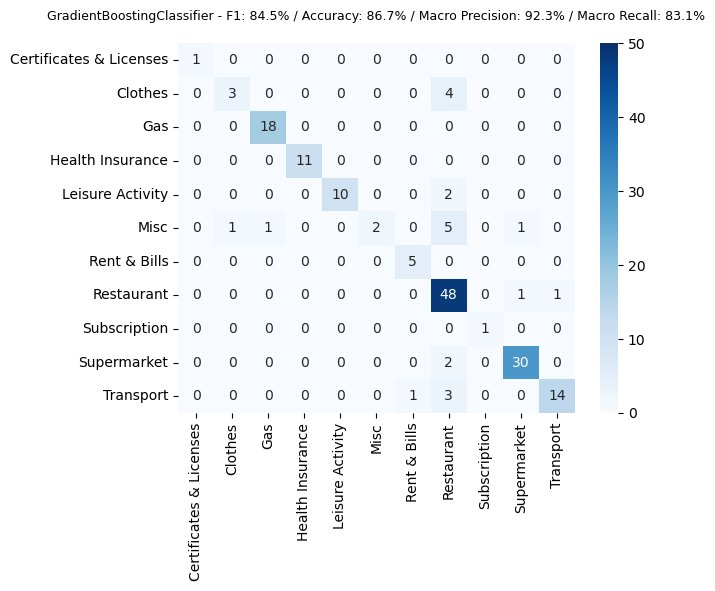

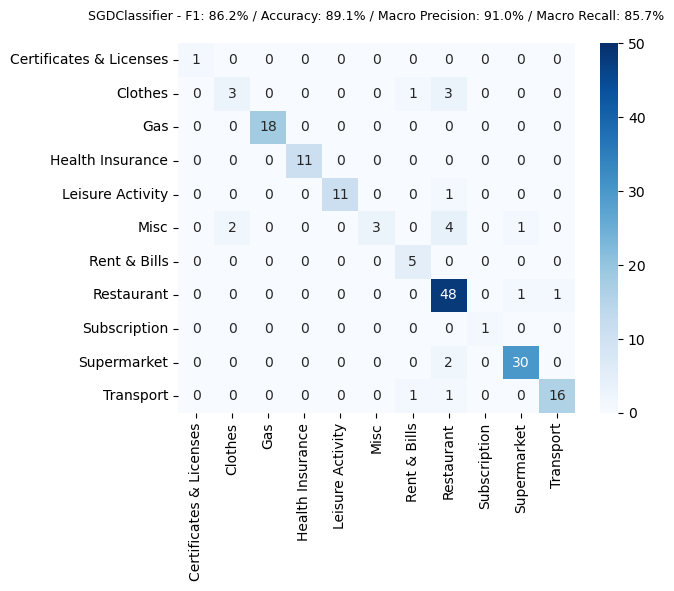

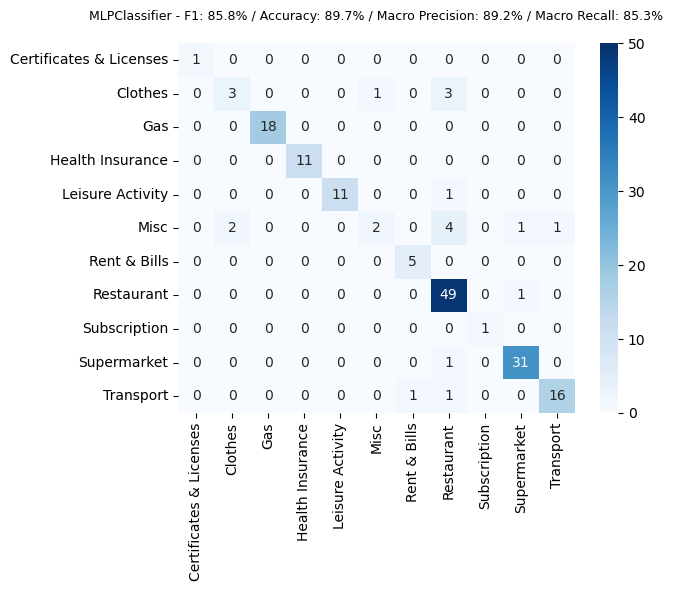

In [109]:
selected_models = ["GradientBoostingClassifier", "SGDClassifier", "MLPClassifier"]

for model in selected_models:
    sns.heatmap(cm_dict.get(model), annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
    cm_accuracy = "{:.1%}".format(accuracy_dict.get(model))
    cm_macrop = "{:.1%}".format(macro_precision_dict.get(model))
    cm_f1 = "{:.1%}".format(f1_dict.get(model))
    cm_macror = "{:.1%}".format(macro_recall_dict.get(model))
    
    plt.title(f"{model} - F1: {cm_f1} / Accuracy: {cm_accuracy} / Macro Precision: {cm_macrop} / Macro Recall: {cm_macror}\n", fontsize=9)
    plt.show()

At first glance, all models perform similarly. Confusions are consistently observed for Clothes and Misc, and to a smaller degree in Transport too. The 3 models performed very well for Certificates & Licenses, Gas, Health Insurance, Rent & Bills, Subscription, and Supermarket.
For the Restaurant category, all models accurately identified true instances; however, transactions from other categories were also frequently misclassified as Restaurant.

### Analysis of misclassified instances

In [111]:
selected_predictions = df_predictions[selected_models]
selected_predictions.insert(0, 'Target', y_test)

for c in selected_predictions.columns:
    selected_predictions[[c]] = oe_target.inverse_transform(selected_predictions[[c]])

df_misclass = X_test.copy()
df_misclass.insert(loc=0, column='row_number', value=np.arange(len(df_misclass)))
df_misclass = pd.merge(df_misclass, selected_predictions, right_index=True, left_on='row_number')

In [112]:
condition_allwrong = (df_misclass.Target != df_misclass.GradientBoostingClassifier) & (
                      df_misclass.Target != df_misclass.SGDClassifier) & (
                      df_misclass.Target != df_misclass.MLPClassifier
                     )

In [127]:
print("Total number of predictions (size of test set) = ", df_misclass.shape[0])
print("Number of predictions that all models predicted incorrectly = ", df_misclass[condition_allwrong].shape[0])
print("Number of incorrect predictions per model:")

for sm in selected_models:
    n_errors = df_misclass[df_misclass.Target != df_misclass[sm]].shape[0]
    print(f"  -{sm} = {n_errors}")

Total number of predictions (size of test set) =  165
Number of predictions that all models predicted incorrectly =  16
Number of incorrect predictions per model:
  -GradientBoostingClassifier = 22
  -SGDClassifier = 18
  -MLPClassifier = 17


In [113]:
df_misclass[condition_allwrong]

row_number  Day of Week  Weekday                          Description  \
393          16            1        1                    The Worker's Shop   
104          19            4        1                 Entrada - Eat Street   
10           29            3        1                           Tênis novo   
534          50            2        1                    Coles - presentes   
532          65            2        1  Big W - cartões & roubo de envelope   
257          68            6        0                      Mercado indiano   
222          78            5        0                             JB Hi-Fi   
63           81            5        0                    Woolies Sanduíche   
536          84            4        1              Souvenirs - João & avós   
537         103            4        1                                 Ímãs   
153         104            0        1                              Dymocks   
54          108            2        1                               Uniqlo   
342         151            0        1                               Ônibus   
25          158            2        1                                 BigW   
42          160            6        0                  Aluguel CarNextDoor   
182         162            2        1                                Kmart   

     Payer Mode of Payment  Amount            Target  \
393    Bia             NAB   70.00           Clothes   
104    Bia             NAB   10.00  Leisure Activity   
10   Bruno             NAB  179.99           Clothes   
534    Bia             NAB   25.40              Misc   
532  Bruno             NAB   16.98              Misc   
257    Bia             NAB    7.12       Supermarket   
222  Bruno             NAB   24.95              Misc   
63     Bia             NAB    6.50        Restaurant   
536  Bruno             NAB   13.85              Misc   
537  Bruno             NAB   15.00              Misc   
153  Bruno             NAB   30.38              Misc   
54     Bia             NAB   49.90           Clothes   
342    Bia             NAB    5.00         Transport   
25     Bia             NAB  115.95           Clothes   
42   Bruno             NAB  244.99         Transport   
182  Bruno             NAB   11.50              Misc   

    GradientBoostingClassifier SGDClassifier MLPClassifier  
393                 Restaurant    Restaurant    Restaurant  
104                 Restaurant    Restaurant    Restaurant  
10                  Restaurant    Restaurant    Restaurant  
534                Supermarket   Supermarket   Supermarket  
532                 Restaurant       Clothes       Clothes  
257                 Restaurant    Restaurant    Restaurant  
222                 Restaurant    Restaurant    Restaurant  
63                 Supermarket   Supermarket   Supermarket  
536                 Restaurant    Restaurant    Restaurant  
537                 Restaurant    Restaurant    Restaurant  
153                 Restaurant    Restaurant    Restaurant  
54                  Restaurant    Restaurant    Restaurant  
342                 Restaurant    Restaurant    Restaurant  
25                  Restaurant  Rent & Bills          Misc  
42                Rent & Bills  Rent & Bills  Rent & Bills  
182                    Clothes       Clothes       Clothes

In [126]:
import itertools

combinations = itertools.combinations(selected_models, 2)

for comb in combinations:
    
    iter_model = list(filter(lambda item: item not in comb, selected_models))[0]
    
    condition_correct = (df_misclass.Target == df_misclass[iter_model]) & (
                         df_misclass.Target != df_misclass[comb[0]]) & (
                         df_misclass.Target != df_misclass[comb[1]]
                        )
    condition_incorrect = (df_misclass.Target != df_misclass[iter_model]) & (
                         df_misclass.Target == df_misclass[comb[0]]) & (
                         df_misclass.Target == df_misclass[comb[1]]
                        )
    
    count_correct = df_misclass[condition_correct].shape[0]
    count_incorrect = df_misclass[condition_incorrect].shape[0]
    
    print(f"Count of predictions only model {iter_model} classified correctly: {count_correct}")
    print(f"Count of predictions only model {iter_model} classified incorrectly: {count_incorrect} \n")   
    

Count of predictions only model MLPClassifier classified correctly: 2
Count of predictions only model MLPClassifier classified incorrectly: 1 

Count of predictions only model SGDClassifier classified correctly: 0
Count of predictions only model SGDClassifier classified incorrectly: 0 

Count of predictions only model GradientBoostingClassifier classified correctly: 0
Count of predictions only model GradientBoostingClassifier classified incorrectly: 4 



The MLPClassifier shows some specialized capabilities and occasional unique flaws, which might be fixed after hyperparameter tuning. 
The SGDClassifier's performance seems to largely overlap with the others. It did not make any unique correct predictions nor any unique incorrect predictions.
The GradientBoostingClassifier shows distinct weaknesses. There are 4 instances where it was the only one to misclassify.

### Fine Tuning with GridSearch

The fine-tuning phase focuses on optimizing the chosen model's performance by systematically adjusting its hyperparameters. To make this step easier, ScikitLearn's GridSearchCV was employed, which exhaustively searches through a specified grid of hyperparameter combinations. For each combination, GridSearchCV also performs embedded cross-validation, training and evaluating the model on multiple folds of the training data.

In [128]:
from sklearn.model_selection import GridSearchCV

<span style="color:red;">Warning!</span> Running GridSearchCV with a GradientBoostingClassifier is computationally intensive and time-consuming. Expect the next cell to take at least 10 minutes to give an output.

In [49]:
gbc_parameters = {
                    "classifier__max_depth":[6,7,8,9],
                    "classifier__subsample":[0.8, 0.9, 1.0],
                    "classifier__n_estimators":[100, 200, 300]
                 }

gbc = GradientBoostingClassifier(verbose=1, random_state=0)
gbc_pipeline = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('classifier', gbc)
                              ]
                       )

gbc_gridsearch = GridSearchCV(gbc_pipeline, gbc_parameters, scoring='f1_macro', cv=5)
gbc_gridsearch.fit(X_train,y_train)
gbc_gridsearch.best_params_

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1254           0.5244            1.81s
         2           0.9463           0.4571            2.53s
         3           0.7809           0.1017            2.85s
         4           0.6609           0.1326            2.87s
         5           0.5785           0.1414            3.03s
         6           0.4898           0.0417            2.81s
         7           0.4338           0.0980            3.09s
         8           0.3848           0.0577            3.34s
         9           0.3389           0.0476            3.33s
        10           0.2952           0.0232            3.38s
        20           0.1060           0.0315            3.04s
        30           0.0471           0.0148            2.66s
        40           0.0234          -0.0036            2.27s
        50           0.0119          -0.0007            1.88s
        60           0.0063           0.0021            1.49s
       

{'classifier__max_depth': 6,
 'classifier__n_estimators': 100,
 'classifier__subsample': 0.8}

In [50]:
gbc_gridsearch.best_score_

0.7408439395472022

In [129]:
sgd_parameters = {
                    'classifier__loss': ['hinge', 'log_loss', 'modified_huber'],
                    'classifier__penalty': ['l2','l1'],
                    'classifier__tol': [1e-3, 1e-4],
                    'classifier__alpha': [0.0001, 0.0005, 0.005]
                 }

sgd = SGDClassifier(random_state=0, verbose=1)
sgd_pipeline = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('classifier', sgd)
                              ]
                       )

sgd_gridsearch = GridSearchCV(sgd_pipeline, sgd_parameters, scoring='f1_macro', cv=5)
sgd_gridsearch.fit(X_train,y_train)
sgd_gridsearch.best_params_

-- Epoch 1
Norm: 121.38, NNZs: 74, Bias: -3.481058, T: 306, Avg. loss: 1.190243
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 81.48, NNZs: 150, Bias: -6.122428, T: 612, Avg. loss: 1.108520
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 68.30, NNZs: 150, Bias: -6.008438, T: 918, Avg. loss: 0.102045
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 59.81, NNZs: 153, Bias: -6.012713, T: 1224, Avg. loss: 0.045462
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 53.12, NNZs: 157, Bias: -6.056696, T: 1530, Avg. loss: 0.014373
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 47.26, NNZs: 160, Bias: -6.094079, T: 1836, Avg. loss: 0.001430
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 42.66, NNZs: 160, Bias: -6.094079, T: 2142, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 39.70, NNZs: 160, Bias: -6.064031, T: 2448, Avg. loss: 0.001675
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 37.00, NNZs: 163, Bias: -6.064073, T: 2754, Avg. loss: 0.0

{'classifier__alpha': 0.005,
 'classifier__loss': 'modified_huber',
 'classifier__penalty': 'l2',
 'classifier__tol': 0.001}

In [130]:
sgd_gridsearch.best_score_

0.7448003659363761

In [53]:
mlp_parameters = {
                    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                    'classifier__activation': ['logistic','tanh', 'relu'],
                    'classifier__solver': ['lbfgs', 'adam'],
                    'classifier__alpha': [0.0001, 0.00005]
                 }

mlp = MLPClassifier(random_state=0, verbose=1)
mlp_pipeline = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('classifier', mlp)
                              ]
                       )

mlp_gridsearch = GridSearchCV(mlp_pipeline, mlp_parameters, scoring='f1_macro', cv=5)
mlp_gridsearch.fit(X_train,y_train)
mlp_gridsearch.best_params_

Iteration 1, loss = 2.43890990
Iteration 2, loss = 2.37796255
Iteration 3, loss = 2.32147234
Iteration 4, loss = 2.27074555
Iteration 5, loss = 2.22275707
Iteration 6, loss = 2.17930603
Iteration 7, loss = 2.14017063
Iteration 8, loss = 2.10562940
Iteration 9, loss = 2.07354980
Iteration 10, loss = 2.04786880
Iteration 11, loss = 2.02341006
Iteration 12, loss = 2.00422154
Iteration 13, loss = 1.98894217
Iteration 14, loss = 1.97528682
Iteration 15, loss = 1.96477792
Iteration 16, loss = 1.95612967
Iteration 17, loss = 1.95044335
Iteration 18, loss = 1.94611520
Iteration 19, loss = 1.94133865
Iteration 20, loss = 1.93770173
Iteration 21, loss = 1.93466040
Iteration 22, loss = 1.93112212
Iteration 23, loss = 1.92822681
Iteration 24, loss = 1.92522606
Iteration 25, loss = 1.92314061
Iteration 26, loss = 1.92089648
Iteration 27, loss = 1.91874138
Iteration 28, loss = 1.91694420
Iteration 29, loss = 1.91538118
Iteration 30, loss = 1.91426931
Iteration 31, loss = 1.91302033
Iteration 32, los

{'classifier__activation': 'tanh',
 'classifier__alpha': 0.0001,
 'classifier__hidden_layer_sizes': (100,),
 'classifier__solver': 'adam'}

In [54]:
mlp_gridsearch.best_score_

0.7440595674910702

#### Evaluating tuned models

Now, the test set is fitted to the tuned models, i.e., the models configured with the best estimators identified through GridSearchCV.

In [55]:
gbc_predictions = gbc_gridsearch.best_estimator_.predict(X_test)
sgd_predictions = sgd_gridsearch.best_estimator_.predict(X_test)
mlp_predictions = mlp_gridsearch.best_estimator_.predict(X_test)

tuned_predictions = {"GradientBoostingClassifier":gbc_predictions, "SGDClassifier":sgd_predictions, "MLPClassifier":mlp_predictions}

for model in tuned_predictions:
    print(f"\033[1m{model}:\033[0m")
    print(classification_report(y_test, tuned_predictions.get(model), digits=3))
    print("\n")

GradientBoostingClassifier:
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000         1
         1.0      0.750     0.429     0.545         7
         2.0      0.947     1.000     0.973        18
         3.0      1.000     1.000     1.000        11
         4.0      0.909     0.833     0.870        12
         5.0      1.000     0.100     0.182        10
         6.0      0.833     1.000     0.909         5
         7.0      0.746     0.940     0.832        50
         8.0      1.000     1.000     1.000         1
         9.0      0.938     0.938     0.938        32
        10.0      0.875     0.778     0.824        18

    accuracy                          0.855       165
   macro avg      0.909     0.820     0.825       165
weighted avg      0.869     0.855     0.834       165



SGDClassifier:
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000         1
         1.0      0.750     0.429

The classification reports reveal a __marginal performance improvement__, with all four metrics for the tuned models largely aligning with those of their untuned counterparts, typically ranging from 85% to 90%.

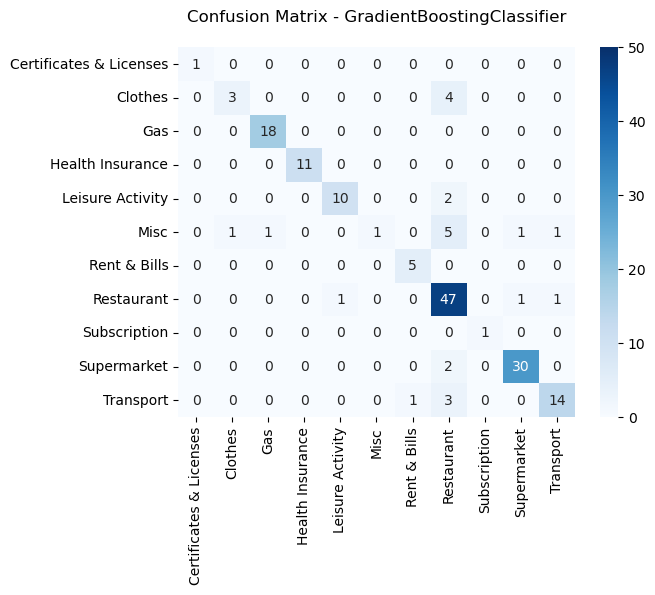

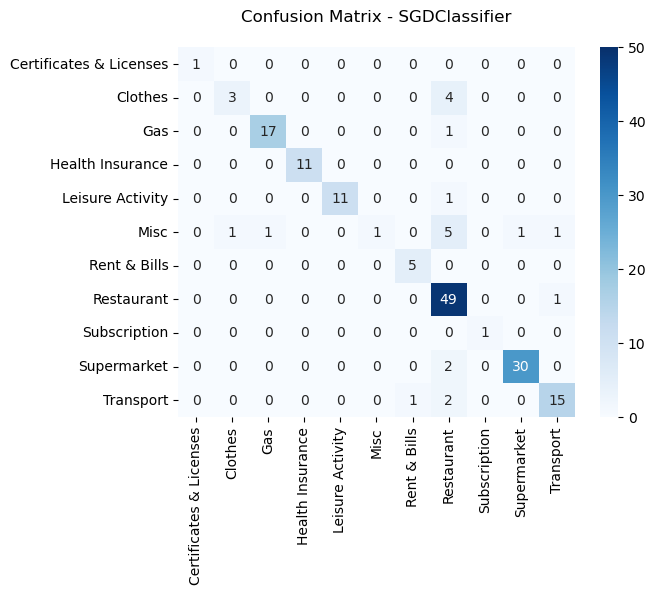

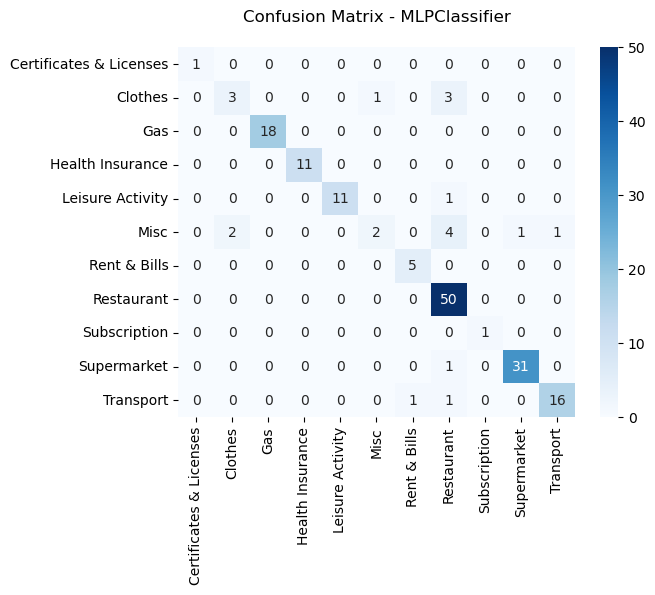

In [56]:
for model in tuned_predictions:
    cm_tuned = confusion_matrix(y_test, tuned_predictions.get(model))
    sns.heatmap(cm_tuned, annot =True, fmt="d", cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
    plt.title(f"Confusion Matrix - {model}\n")
    plt.show()

In [57]:
tuned_accuracy_dict = {}
tuned_f1_dict = {}
tuned_macro_precision_dict = {}
tuned_macro_recall_dict = {}

for model in tuned_predictions:
 
    accuracy_tuned = accuracy_score(y_test, tuned_predictions.get(model))
    tuned_accuracy_dict.update({model:accuracy_tuned})

    f1_tuned = f1_score(y_test, tuned_predictions.get(model), average='macro')
    tuned_f1_dict.update({model:f1_tuned})
    
    macro_precision_tuned = precision_score(y_test, tuned_predictions.get(model), average='macro')
    tuned_macro_precision_dict.update({model:macro_precision_tuned})

    macro_recall_tuned = recall_score(y_test, tuned_predictions.get(model), average='macro')
    tuned_macro_recall_dict.update({model:macro_recall_tuned})

df_tuned_modelres = pd.DataFrame(
                                 [tuned_accuracy_dict, tuned_f1_dict, tuned_macro_precision_dict, tuned_macro_recall_dict]
                                ).T.rename(
                                            columns={0:'Accuracy', 1:'F1_Score' , 2:'Macro_Precision', 3:'Macro_Recall'}
                                          )

df_tuned_modelres = df_tuned_modelres.stack().reset_index().set_axis(['Model', 'Metric', 'Value'], axis=1)

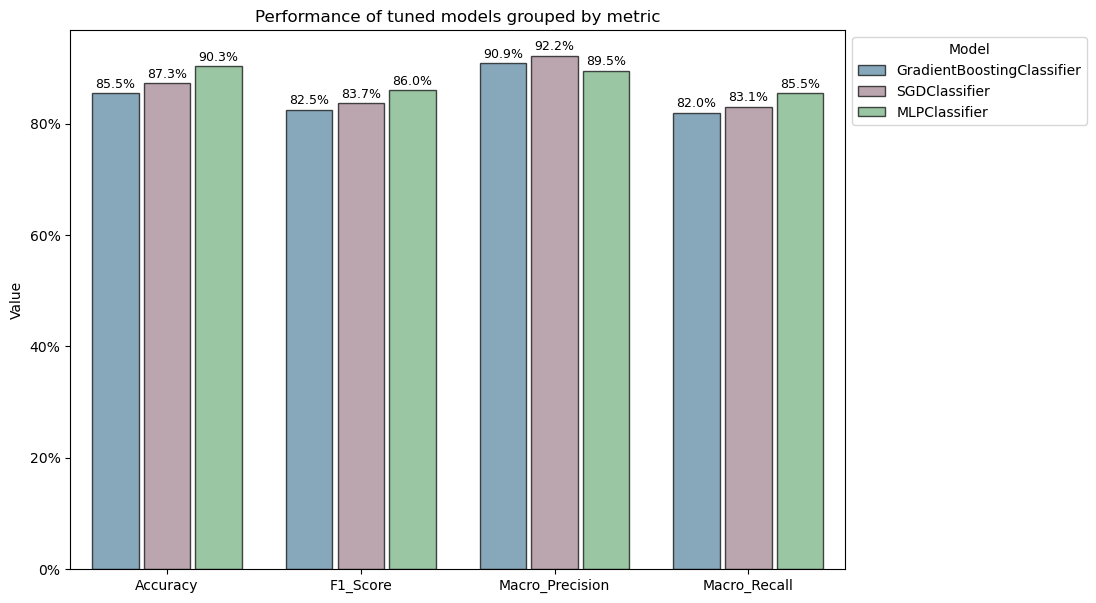

In [58]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,7))
colors = ['#4987AB', '#A37B8F', '#65B876']

figure = sns.barplot(data=df_tuned_modelres, x='Metric', y='Value', hue='Model', alpha=0.7, edgecolor='black', palette=colors, gap=0.1)
sns.move_legend(figure, "upper left", bbox_to_anchor=(1, 1), title='Model')
figure.set_title('Performance of tuned models grouped by metric')
figure.set_xlabel(xlabel=None)
figure.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for p in figure.patches[:-3:1]:
    figure.text(p.get_x() + p.get_width() / 2, p.get_height()+0.005,
            f'{p.get_height():.1%}', ha='center', va='bottom', fontsize=9)

plt.show()

The __MLPClassifier__ generally demonstrates the strongest overall performance, leading in Accuracy (90.3%), F1_Score (86.0%), and Macro_Recall (85.5%).<br>
The __SGDClassifier__ is a close contender, achieving the highest Macro_Precision (92.2%) and competitive scores across other metrics.<br>
The __GradientBoostingClassifier__ consistently performs slightly lower than the other two across all evaluated metrics.

Given that the F1 Score was chosen as the primary evaluation metric due to its balance of precision and recall and handling of class imbalance, <b style="color:maroon;"> __the MLPClassifier is the preferred choice.__</b>

## Chosen model: MLP Classifier

In [59]:
mlp_gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_categorical',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Payer', 'Mode of Payment']),
                                                 ('free_text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'Description'),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Amount'])])),
                ('classifier',
                 MLPClassifier(activation='tanh', random_state=0, verbose=1))])

In [132]:
import joblib

path_results = r'C:\Users\biaka\OneDrive\Documents\JupyterNotebooks\ExpensesClassification\results'
model_file_name = r'MLPClassifier_tuned.pkl'

joblib.dump(mlp_gridsearch.best_estimator_, os.path.join(path_results, model_file_name))

['C:\\Users\\biaka\\OneDrive\\Documents\\JupyterNotebooks\\ExpensesClassification\\results\\MLPClassifier_tuned.pkl']

#### Predictions for new unlabeled data

The final step - and the whole goal of this small project - is to take the best-performing, fine-tuned model and use it to classify the expenses of a third, unseen city (Jabiru).

In [60]:
X_jabiru = df_jabiru.copy()
X_jabiru['Day of Week'] = X_jabiru['Date'].dt.dayofweek
X_jabiru['Weekday'] = np.where(X_jabiru['Day of Week'] < 5, 1, 0)
X_jabiru = X_jabiru[features]

In [61]:
result = mlp_gridsearch.best_estimator_.predict(X_jabiru)
result = oe_target.inverse_transform(result.reshape(-1, 1))

In [62]:
X_jabiru.reset_index(inplace=True)
X_jabiru['Category'] = pd.DataFrame(result)
X_jabiru = X_jabiru[['index', 'Category']]
X_jabiru.set_index('index', inplace=True)

In [63]:
df_jabiru.drop('Category', axis=1, inplace=True)
df_jabiru = df_jabiru.join(X_jabiru, how='left')

In [133]:
result_file_name = 'Results_' + file_name
df_jabiru.to_excel(os.path.join(path_results, result_file_name), index=False)